<a href="https://colab.research.google.com/github/kokorina-irina/ML/blob/master/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка и первичный анализ данных 

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
import sklearn.preprocessing
%matplotlib inline 
sns.set(style="ticks")

In [0]:
data=pd.read_csv("googleplaystore.csv")

In [0]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [66]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [67]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [68]:
data.shape

(10841, 13)

# Обработка пропусков

In [69]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [70]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

App - 0.0%
Category - 0.0%
Rating - 14.0%
Reviews - 0.0%
Size - 0.0%
Installs - 0.0%
Type - 0.0%
Price - 0.0%
Content Rating - 0.0%
Genres - 0.0%
Last Updated - 0.0%
Current Ver - 0.0%
Android Ver - 0.0%


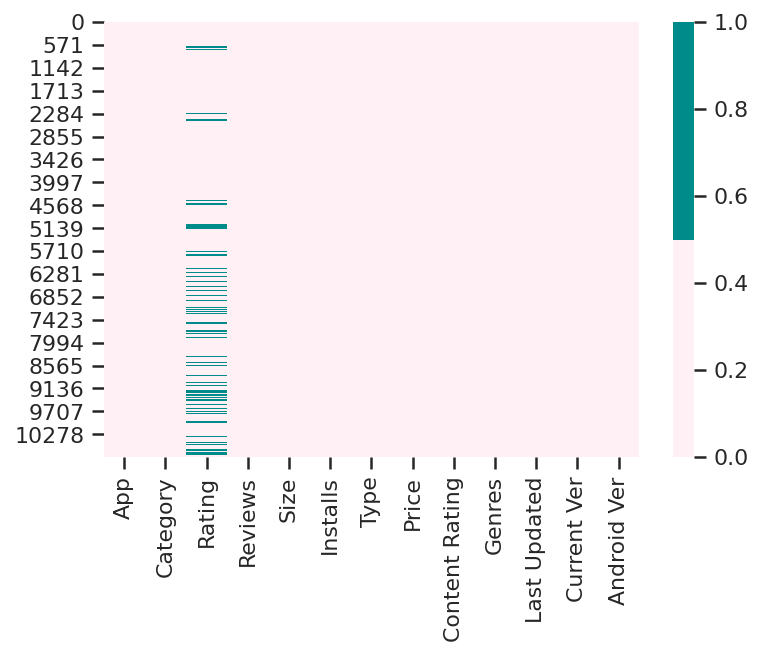

In [74]:
cols = data.columns[:16]
colours = ['#FFF0F5', '#008B8B'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

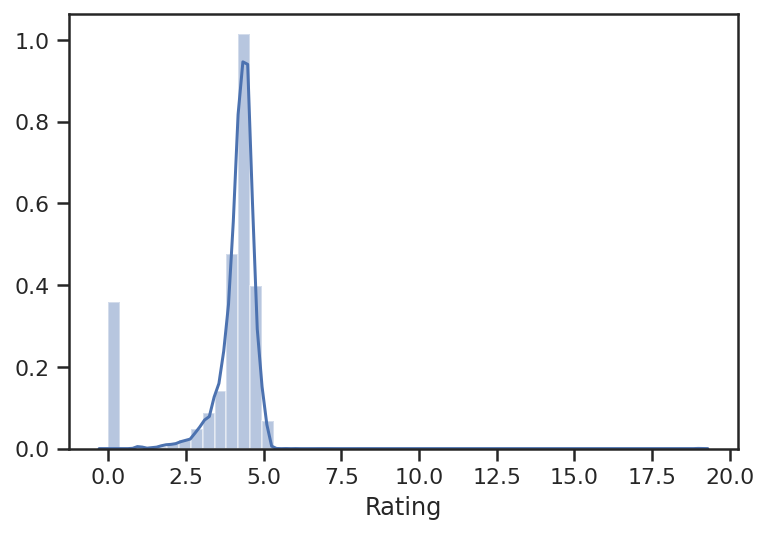

In [77]:

sns.distplot(data["Rating"].fillna(0))

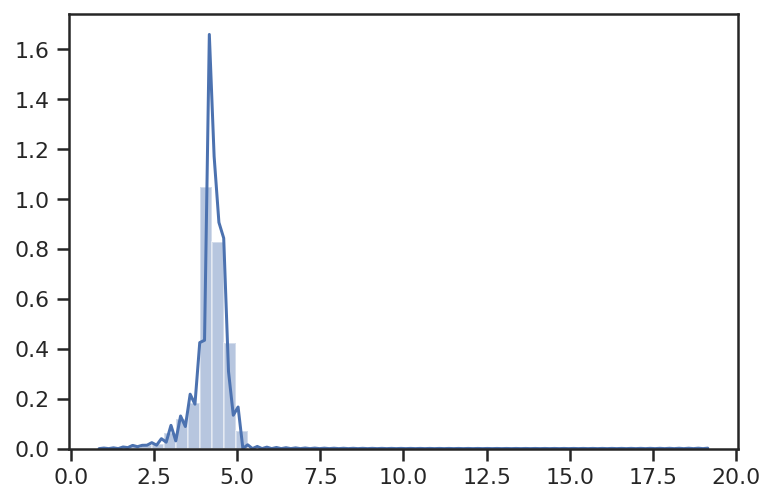

In [78]:
rate=sklearn.impute.SimpleImputer(strategy="mean")
mean_rate=rate.fit_transform(data[["Rating"]])
sns.distplot(mean_rate)

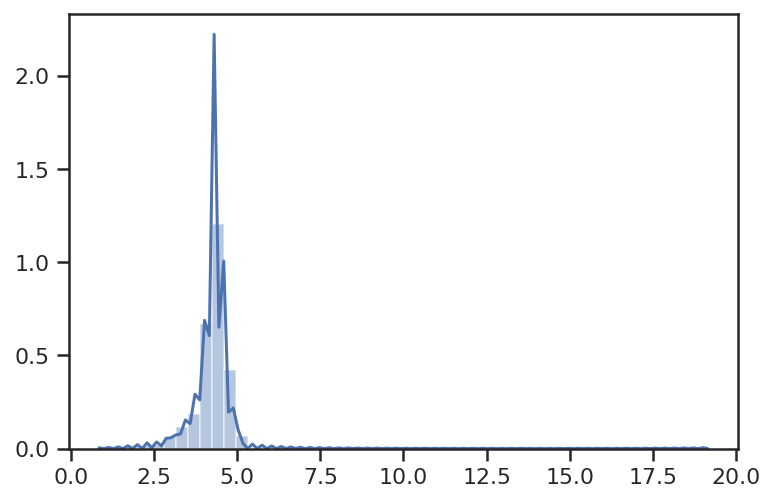

In [79]:
med=sklearn.impute.SimpleImputer(strategy="median")
med_rate=med.fit_transform(data[["Rating"]])
sns.distplot(med_rate)

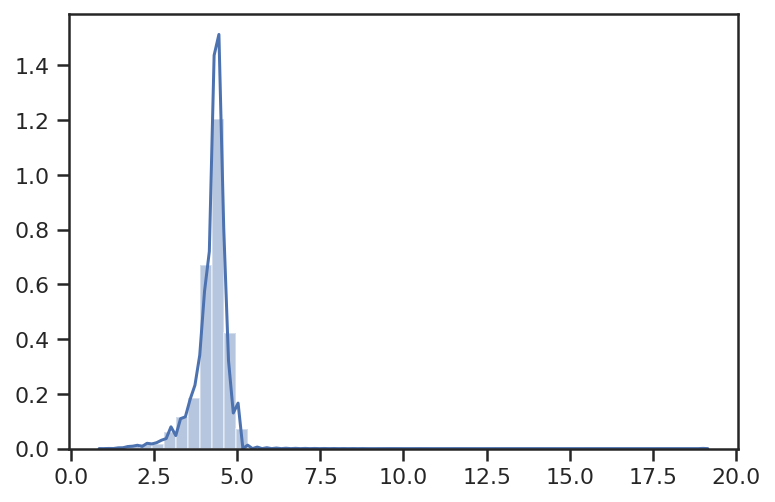

In [80]:
freq=sklearn.impute.SimpleImputer(strategy="most_frequent")
freq_rate=freq.fit_transform(data[["Rating"]])
sns.distplot(freq_rate)

In [0]:
data['Rating']= mean_rate

# Кодирование категориальных признаков

In [82]:
types=data["Type"].dropna().astype(str)
types.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [83]:
le=sklearn.preprocessing.LabelEncoder()
type_le=le.fit_transform(types)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[0 1 2]


array(['0', 'Free', 'Paid'], dtype=object)

In [84]:

type_s=pd.get_dummies(types)
type_s.head()

,0,Free,Paid
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [85]:
type_s[type_s['Paid']==1].head()

,0,Free,Paid
234,0,0,1
235,0,0,1
290,0,0,1
291,0,0,1
427,0,0,1


#  MinMax масштабирование

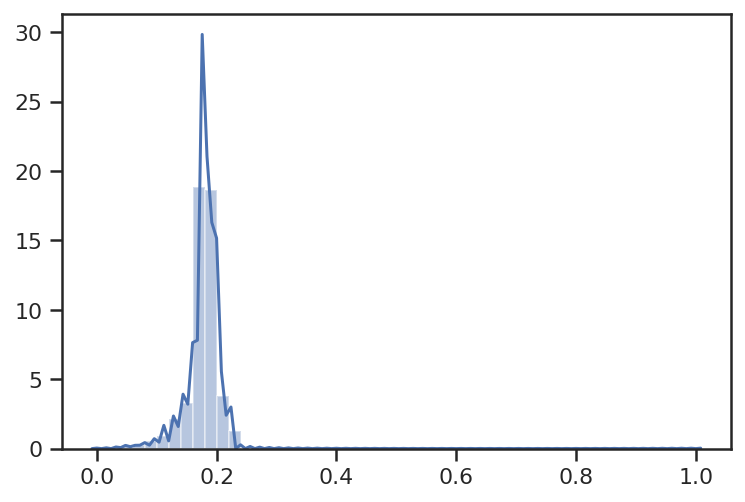

In [86]:
mm=sklearn.preprocessing.MinMaxScaler()
sns.distplot(mm.fit_transform(data[["Rating"]]))

# Масштабирование данных на основе Z-оценки - StandardScaler

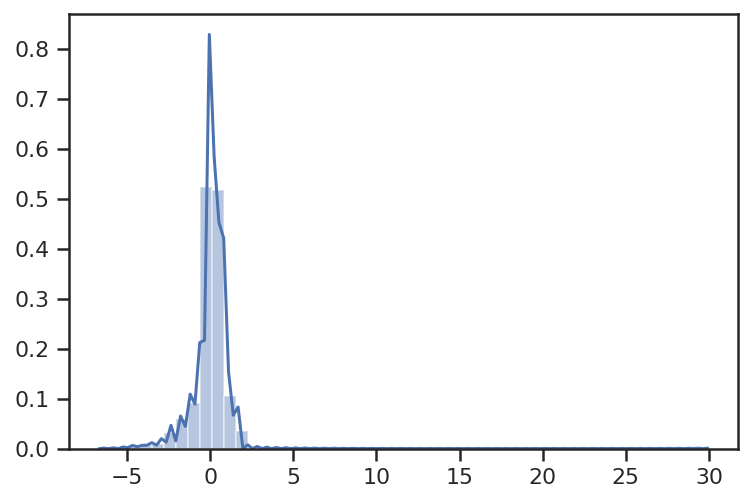

In [87]:
ss=sklearn.preprocessing.StandardScaler()
sns.distplot(ss.fit_transform(data[["Rating"]]))

# НОРМАЛИЗАЦИЯ ДАННЫХ

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


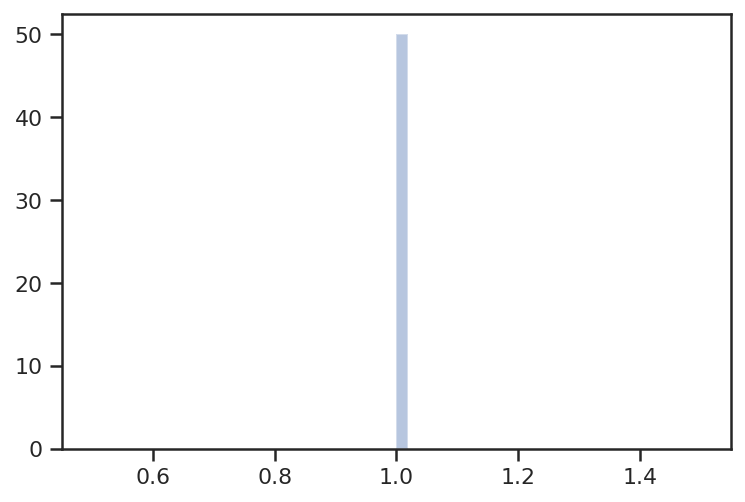

In [88]:
norm=sklearn.preprocessing.Normalizer()
sns.distplot(norm.fit_transform(data[["Rating"]]))